In [132]:
import spacy
from spacy.symbols import nsubj, VERB
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pymongo
from pymongo import MongoClient
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [133]:
#Lista com a URL de cada artigo
urls = [
"https://www1.folha.uol.com.br/banco-de-dados/2021/04/1971-instituto-de-pesquisas-espaciais-e-criado-para-estudos-no-ambito-civil.shtml",
"https://www1.folha.uol.com.br/banco-de-dados/2021/05/1971-sorvete-em-quadra-esfria-a-reacao-da-selecao-feminina-de-basquete.shtml",
'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-astronautas-da-apollo-14-chegam-a-terra-e-terminam-missao-com-exito.shtml',
'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-astronautas-da-apollo-14-terminam-missao-na-lua-e-viajam-para-a-terra.shtml',
'https://www1.folha.uol.com.br/banco-de-dados/2021/03/1971-futuro-prefeito-de-sao-paulo-aponta-metro-como-uma-das-prioridades.shtml ',
'https://www1.folha.uol.com.br/banco-de-dados/2021/01/1971-astronautas-vao-voltar-a-viajar-para-a-lua-depois-do-drama-da-apollo-13.shtml',
'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-usp-precisa-receber-mais-dinheiro-para-nao-parar.shtml ',
'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-ingleses-propoem-que-nobel-da-paz-seja-entregue-aos-irmaos-villas-boas.shtml',
'https://www1.folha.uol.com.br/banco-de-dados/2021/02/1971-ira-incentiva-que-paises-produtores-de-petroleo-determinem-o-reajuste.shtml ',
'https://www1.folha.uol.com.br/banco-de-dados/2021/01/1971-estudantes-localizam-o-1o-foco-de-ferrugem-do-cafeeiro-em-sao-paulo.shtml  ',
]

In [134]:
#Criando um lista com os textos e puxando suas informações da web sem tags.
lista = []

for artigos in urls:
    response = urlopen(artigos)
    html = response.read().decode('utf-8')
    " ".join(html.split()).replace('> <', '><')
    soup = BeautifulSoup(html, 'html.parser')

    titulo = soup.find('h1', {'class':'c-content-head__title'}).get_text()
    titulo = "".join(titulo.strip() for linha in range(len(titulo.split("\n")) -2))
    artigo = soup.find('div', {'class': 'c-news__body'}).get_text()
    artigo = artigo.replace('\n', ' ').replace('\r', '').replace('  ', '').replace('Primeira        Página da Folha de', '').replace('- Reprodução', '')
    
    conteudo = {}
    conteudo[titulo] = artigo
    print(conteudo)

{'1971: Instituto de Pesquisas Espaciais é criado para estudos no âmbito civil': ' O presidente Emílio Garrastazu Médici assinou na quinta-feira (22) o decreto que cria o Instituto de Pesquisas Espaciais e que extingue o Grupo de Organização da Comissão Nacional de Atividades Especiais. O instituto está subordinado ao Conselho Nacional de Pesquisas e é um órgão de execução para o desenvolvimento de estudos espaciais no âmbito civil. Atuará no planejamento e supervisionamento dos programas do setor, aplicará os projetos e também promoverá a formação de pessoal especializado. Em sua estrutura, terá um conselho diretor, uma direção científica e uma direção administrativa. Primeira Página da Folha de 24 de abril de 1971 '}
{'1971: Sorvete em quadra esfria a reação da seleção feminina de basquete': ' Um garoto telefonou para o hotel em que se hospeda a seleção feminina de basquete para se desculpar por ter jogado um sorvete na quadra do Ibirapuera no momento em que a equipe havia empatado o

In [135]:

#Acessando o banco e gravando gravando os textos
myclient = MongoClient('localhost', 27017)
mydb = myclient["Textos"]
mycol = mydb["texto"]
mydict = { "texto": lista}
x = mycol.insert_one(mydict)

In [136]:
#Mostrando os textos no mongo
mostratudo = mycol.find()
for data in mostratudo:
  print(data)

{'_id': ObjectId('60ba71855abfd12bf276af00'), 'texto': []}
{'_id': ObjectId('60baa72c2c1cc86bb00176ef'), 'texto': []}
{'_id': ObjectId('60baae182c1cc86bb00176f1'), 'texto': []}
{'_id': ObjectId('60babff92c1cc86bb00176f3'), 'texto': []}
{'_id': ObjectId('60bac26b2c1cc86bb00176f5'), 'texto': []}
{'_id': ObjectId('60bac2f82c1cc86bb00176f7'), 'texto': []}
{'_id': ObjectId('60bac5e92c1cc86bb00176f9'), 'texto': []}
{'_id': ObjectId('60bac8142c1cc86bb00176fb'), 'texto': []}
{'_id': ObjectId('60baccfa2c1cc86bb00176fd'), 'texto': []}
{'_id': ObjectId('60bacf512c1cc86bb00176ff'), 'texto': []}
{'_id': ObjectId('60bacf812c1cc86bb0017701'), 'texto': []}
{'_id': ObjectId('60bad0442c1cc86bb0017703'), 'texto': []}
{'_id': ObjectId('60bad362d5a05dd3fd82d79f'), 'texto': []}
{'_id': ObjectId('60bad46ed5a05dd3fd82d7a1'), 'texto': []}
{'_id': ObjectId('60bb6296b28bcf1ccc4f13ae'), 'texto': []}
{'_id': ObjectId('60bb7a32b28bcf1ccc4f13b0'), 'texto': []}
{'_id': ObjectId('60bb8e6221b2fbf9d0d85a14'), 'texto': [

In [137]:
#Iniciando Biblioteca Spacy
nlp = spacy.load("pt_core_news_sm")

In [138]:
#Puxando o texto 1
texto1 = "1971: Instituto de Pesquisas Espaciais é criado para estudos no âmbito civil  ': 'O presidente Emílio Garrastazu Médici assinou na quinta-feira (22) o decreto que cria o Instituto de Pesquisas Espaciais e que extingue o Grupo de Organização da Comissão Nacional de Atividades Especiais.O instituto está subordinado ao Conselho Nacional de Pesquisas e é um órgão de execução para o desenvolvimento de estudos espaciais no âmbito civil. Atuará no planejamento e supervisionamento dos programas do setor, aplicará os projetos e também promoverá a formação de pessoal especializado.Em sua estrutura, terá um conselho diretor, uma direção científica e uma direção administrativa.      Primeira Página da Folha de 24 de abril de 1971             - Reprodução"
doc1 = nlp(texto1)

In [139]:
doc1

1971: Instituto de Pesquisas Espaciais é criado para estudos no âmbito civil  ': 'O presidente Emílio Garrastazu Médici assinou na quinta-feira (22) o decreto que cria o Instituto de Pesquisas Espaciais e que extingue o Grupo de Organização da Comissão Nacional de Atividades Especiais.O instituto está subordinado ao Conselho Nacional de Pesquisas e é um órgão de execução para o desenvolvimento de estudos espaciais no âmbito civil. Atuará no planejamento e supervisionamento dos programas do setor, aplicará os projetos e também promoverá a formação de pessoal especializado.Em sua estrutura, terá um conselho diretor, uma direção científica e uma direção administrativa.      Primeira Página da Folha de 24 de abril de 1971             - Reprodução

In [140]:
#Tokenização texto1
tokens = [token for token in doc1]
[(token.orth_, token.pos_) for token in doc1]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Instituto', 'PROPN'),
 ('de', 'ADP'),
 ('Pesquisas', 'PROPN'),
 ('Espaciais', 'PROPN'),
 ('é', 'AUX'),
 ('criado', 'VERB'),
 ('para', 'ADP'),
 ('estudos', 'NOUN'),
 ('no', 'ADP'),
 ('âmbito', 'NOUN'),
 ('civil', 'ADJ'),
 (' ', 'SPACE'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('O', 'DET'),
 ('presidente', 'NOUN'),
 ('Emílio', 'PROPN'),
 ('Garrastazu', 'PROPN'),
 ('Médici', 'PROPN'),
 ('assinou', 'VERB'),
 ('na', 'ADP'),
 ('quinta-feira', 'NOUN'),
 ('(', 'PUNCT'),
 ('22', 'NUM'),
 (')', 'PUNCT'),
 ('o', 'DET'),
 ('decreto', 'NOUN'),
 ('que', 'PRON'),
 ('cria', 'VERB'),
 ('o', 'DET'),
 ('Instituto', 'PROPN'),
 ('de', 'ADP'),
 ('Pesquisas', 'PROPN'),
 ('Espaciais', 'PROPN'),
 ('e', 'CCONJ'),
 ('que', 'PRON'),
 ('extingue', 'VERB'),
 ('o', 'DET'),
 ('Grupo', 'PROPN'),
 ('de', 'ADP'),
 ('Organização', 'PROPN'),
 ('da', 'ADP'),
 ('Comissão', 'PROPN'),
 ('Nacional', 'PROPN'),
 ('de', 'ADP'),
 ('Atividades', 'PROPN'),
 ('Especiais', 'PROPN'),
 

In [141]:
#indentificando as entidades do texto 1
for ent in doc1.ents:
    print(ent.text, ent.label_)

Instituto de Pesquisas Espaciais LOC
Emílio Garrastazu Médici PER
Instituto de Pesquisas Espaciais LOC
Grupo de Organização da Comissão Nacional de Atividades Especiais ORG
Conselho Nacional de Pesquisas ORG
Atuará LOC


In [142]:
#indentificando as verbos do texto 1
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto1)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{cria, extingue, assinou, aplicará}


['criar',
 'assinar',
 'criar',
 'extinguir',
 'Atuará',
 'aplicar',
 'promover',
 'especializar',
 'ter']

In [143]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo1.txt", "r", encoding='utf-8') as f:
    artigos = f.read()


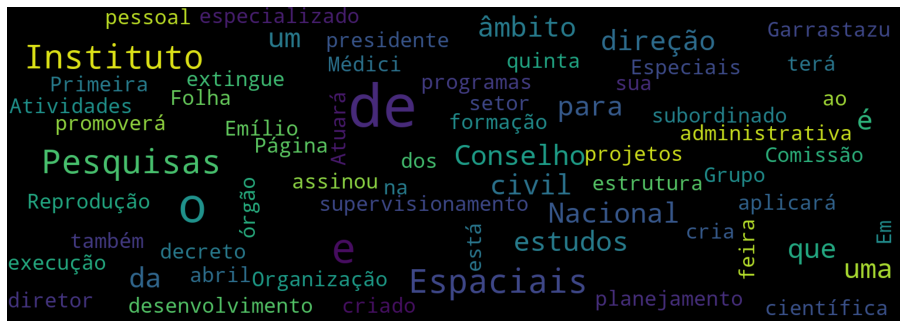

In [144]:
#Nuven de Palavras referente ao texto 1.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [145]:
#Treinado o Tweets
dataset = pd.read_csv('C:/Users/Vanessa/.vscode/avaliacao 3/Tweets_Mg.csv',encoding='utf-8')
dataset.count()


Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [146]:
dataset[dataset.Classificacao == 'Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [147]:
dataset[dataset.Classificacao == 'Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [148]:
dataset[dataset.Classificacao == 'Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [149]:
dataset.head()

Unnamed: 0                      Created At  \
0           0  Sun Jan 08 01:22:05 +0000 2017   
1           1  Sun Jan 08 01:49:01 +0000 2017   
2           2  Sun Jan 08 01:01:46 +0000 2017   
3           3  Wed Jan 04 21:43:51 +0000 2017   
4           4  Mon Jan 09 15:08:21 +0000 2017   

                                                Text  \
0  ���⛪ @ Catedral de Santo Antônio - Governador ...   
1  � @ Governador Valadares, Minas Gerais https:/...   
2  �� @ Governador Valadares, Minas Gerais https:...   
3                        ��� https://t.co/BnDsO34qK0   
4  ��� PSOL vai questionar aumento de vereadores ...   

   Geo Coordinates.latitude  Geo Coordinates.longitude User Location  \
0                       NaN                        NaN        Brasil   
1                  -41.9333                     -18.85           NaN   
2                  -41.9333                     -18.85           NaN   
3                       NaN                        NaN           NaN   
4                       NaN                        NaN           NaN   

               Username User Screen Name  Retweet Count Classificacao  ...  \
0  Leonardo C Schneider    LeoCSchneider              0        Neutro  ...   
1               Wândell         klefnews              0        Neutro  ...   
2               Wândell         klefnews              0        Neutro  ...   
3         Ana estudando  estudandoconcur              0        Neutro  ...   
4                 Emily         Milly777              0      Negativo  ...   

  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 26 columns]

In [150]:
tweets = dataset["Text"].values
tweets

array(['���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ',
       '� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf',
       '�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw',
       ...,
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia https://t.co/zaQbXRRJWc',
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia: Um dos autores teria molestado vítima de… https://t.co/lQ8cTSNftA',
       'Trio suspeito de roubo de cargas é preso em Santa Luzia (MG) https://t.co/0INgJcMtZb #R7MG #RecordTVMinas'],
      dtype=object)

In [151]:
classes = dataset["Classificacao"].values
classes

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'], dtype=object)

In [152]:
#vetorizando 
Vectorizer = CountVectorizer(analyzer = "word")
freq_tweets = Vectorizer.fit_transform(tweets)

modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB()

In [153]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv = 10)
resultados

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'], dtype='<U8')

In [154]:
metrics.accuracy_score(classes, resultados)

0.8831564824978656

In [155]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(classes, resultados, sentimentos))

C:\Users\Vanessa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
              precision    recall  f1-score   support

    Positivo       0.95      0.88      0.91      3300
    Negativo       0.89      0.93      0.91      2446
      Neutro       0.80      0.84      0.82      2453

    accuracy                           0.88      8199
   macro avg       0.88      0.88      0.88      8199
weighted avg       0.89      0.88      0.88      8199



In [156]:
#Puxando o texto2
texto2 = "1971: Sorvete em quadra esfria a reação da seleção feminina de basquete': ' Um garoto telefonou para o hotel em que se hospeda a seleção feminina de basquete para se desculpar por ter jogado um sorvete na quadra do Ibirapuera no momento em que a equipe havia empatado o jogo contra a Tchecoslováquia e ganhava entusiasmo. O supervisor do time brasileiro, Brito Cunha, disse que a paralisação a três minutos do fim, quando torcedores jogaram papéis além do sorvete na quadra, foi “um motivo capital para a derrota” do Brasil. Os árbitros pararam a partida, e a atletas adversárias tiveram tempo de se acalmar e ouvir o técnico. O duelo de quinta-feira (27), válido pelo Mundial, terminou: 59 a 68.Primeira Página da Folha de 29 de maio de 1971"
doc2 = nlp(texto2)

In [157]:
doc2

1971: Sorvete em quadra esfria a reação da seleção feminina de basquete': ' Um garoto telefonou para o hotel em que se hospeda a seleção feminina de basquete para se desculpar por ter jogado um sorvete na quadra do Ibirapuera no momento em que a equipe havia empatado o jogo contra a Tchecoslováquia e ganhava entusiasmo. O supervisor do time brasileiro, Brito Cunha, disse que a paralisação a três minutos do fim, quando torcedores jogaram papéis além do sorvete na quadra, foi “um motivo capital para a derrota” do Brasil. Os árbitros pararam a partida, e a atletas adversárias tiveram tempo de se acalmar e ouvir o técnico. O duelo de quinta-feira (27), válido pelo Mundial, terminou: 59 a 68.Primeira Página da Folha de 29 de maio de 1971

In [158]:
#Tokenização do texto2
tokens = [token for token in doc2]
[(token.orth_, token.pos_) for token in doc2]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Sorvete', 'NOUN'),
 ('em', 'ADP'),
 ('quadra', 'NOUN'),
 ('esfria', 'VERB'),
 ('a', 'DET'),
 ('reação', 'NOUN'),
 ('da', 'ADP'),
 ('seleção', 'NOUN'),
 ('feminina', 'ADJ'),
 ('de', 'ADP'),
 ('basquete', 'NOUN'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('Um', 'DET'),
 ('garoto', 'NOUN'),
 ('telefonou', 'VERB'),
 ('para', 'ADP'),
 ('o', 'DET'),
 ('hotel', 'NOUN'),
 ('em', 'ADP'),
 ('que', 'PRON'),
 ('se', 'PRON'),
 ('hospeda', 'VERB'),
 ('a', 'DET'),
 ('seleção', 'NOUN'),
 ('feminina', 'ADJ'),
 ('de', 'ADP'),
 ('basquete', 'NOUN'),
 ('para', 'SCONJ'),
 ('se', 'PRON'),
 ('desculpar', 'VERB'),
 ('por', 'SCONJ'),
 ('ter', 'AUX'),
 ('jogado', 'VERB'),
 ('um', 'DET'),
 ('sorvete', 'NOUN'),
 ('na', 'ADP'),
 ('quadra', 'NOUN'),
 ('do', 'ADP'),
 ('Ibirapuera', 'PROPN'),
 ('no', 'ADP'),
 ('momento', 'NOUN'),
 ('em', 'ADP'),
 ('que', 'PRON'),
 ('a', 'DET'),
 ('equipe', 'NOUN'),
 ('havia', 'AUX'),
 ('empatado', 'VERB'),
 ('o', 'DET'),
 ('jogo', 'NOU

In [159]:
#indentificando as entidades do texto 2
for ent in doc2.ents:
    print(ent.text, ent.label_)

Sorvete PER
Ibirapuera LOC
Tchecoslováquia LOC
Brito Cunha PER
do Brasil MISC
Mundial MISC
Página da Folha LOC


In [160]:
#indentificando os verbos do texto 2.
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto2)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{telefonou, empatado, disse, jogaram, terminou, acalmar, pararam, hospeda}


['esfriar',
 'telefonar',
 'hospedar',
 'desculpar',
 'jogar',
 'empatar',
 'ganhar',
 'dizer',
 'jogar',
 'parar',
 'ter',
 'acalmar',
 'ouvir',
 'terminar']

In [161]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo2.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

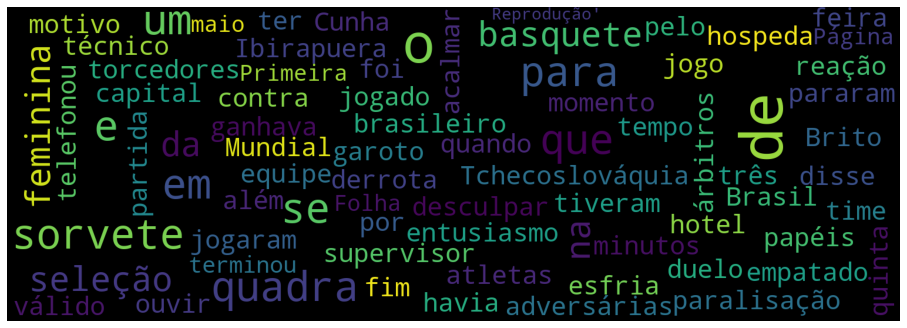

In [162]:
#Nuven de Palavras referente ao texto 2.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [163]:
#Puxando o texto3
texto3 = "1971: Astronautas da Apollo 14 chegam à Terra e terminam missão com êxito': ' Com sucesso total, encerrou-se às 18h05 (horário de Brasília) desta terça-feira (9) a missão da Apollo 14, que foi a mais demorada e mais importante exploração da Lua pelo homem até hoje.Conforme estava estabelecido, os astronautas pousaram no oceano Pacífico a apenas oito quilômetros do navio de resgate. Alan Shepard Jr., Stuart Roosa e Edgar Mitchell foram resgatados por dois helicópteros e, em seguida, iniciaram uma quarentena, para evitar qualquer possível contaminação. Na Nasa, ao se falar de novas missões, há opiniões divergentes sobre o limite para a atividade do homem na Lua.Primeira Página da Folha de 10de fevereiro de 1971"

doc3 = nlp(texto3)

In [164]:
doc3

1971: Astronautas da Apollo 14 chegam à Terra e terminam missão com êxito': ' Com sucesso total, encerrou-se às 18h05 (horário de Brasília) desta terça-feira (9) a missão da Apollo 14, que foi a mais demorada e mais importante exploração da Lua pelo homem até hoje.Conforme estava estabelecido, os astronautas pousaram no oceano Pacífico a apenas oito quilômetros do navio de resgate. Alan Shepard Jr., Stuart Roosa e Edgar Mitchell foram resgatados por dois helicópteros e, em seguida, iniciaram uma quarentena, para evitar qualquer possível contaminação. Na Nasa, ao se falar de novas missões, há opiniões divergentes sobre o limite para a atividade do homem na Lua.Primeira Página da Folha de 10de fevereiro de 1971

In [165]:
#Tokenização do texto3
tokens = [token for token in doc3]
[(token.orth_, token.pos_) for token in doc3]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Astronautas', 'PROPN'),
 ('da', 'ADP'),
 ('Apollo', 'PROPN'),
 ('14', 'NUM'),
 ('chegam', 'VERB'),
 ('à', 'ADP'),
 ('Terra', 'PROPN'),
 ('e', 'CCONJ'),
 ('terminam', 'VERB'),
 ('missão', 'NOUN'),
 ('com', 'ADP'),
 ('êxito', 'NOUN'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('Com', 'ADP'),
 ('sucesso', 'NOUN'),
 ('total', 'ADJ'),
 (',', 'PUNCT'),
 ('encerrou-se', 'VERB'),
 ('às', 'ADP'),
 ('18h05', 'NOUN'),
 ('(', 'PUNCT'),
 ('horário', 'NOUN'),
 ('de', 'ADP'),
 ('Brasília', 'PROPN'),
 (')', 'PUNCT'),
 ('desta', 'ADP'),
 ('terça-feira', 'NOUN'),
 ('(', 'PUNCT'),
 ('9', 'NUM'),
 (')', 'PUNCT'),
 ('a', 'DET'),
 ('missão', 'NOUN'),
 ('da', 'ADP'),
 ('Apollo', 'PROPN'),
 ('14', 'PROPN'),
 (',', 'PUNCT'),
 ('que', 'PRON'),
 ('foi', 'AUX'),
 ('a', 'DET'),
 ('mais', 'ADV'),
 ('demorada', 'NOUN'),
 ('e', 'CCONJ'),
 ('mais', 'ADV'),
 ('importante', 'ADJ'),
 ('exploração', 'NOUN'),
 ('da', 'ADP'),
 ('Lua', 'NOUN'),
 ('pelo', 'ADP'),
 ('homem', 'NOU

In [166]:
#indentificando as entidades do texto 3
for ent in doc3.ents:
    print(ent.text, ent.label_)

Astronautas PER
Apollo 14 MISC
Terra LOC
Brasília LOC
Apollo 14 MISC
Lua LOC
oceano Pacífico LOC
Alan Shepard Jr. PER
Stuart Roosa PER
Edgar Mitchell PER
Nasa ORG
Lua LOC
Primeira Página da Folha LOC


In [167]:
#indentificando os verbos do texto 3.  
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto3)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{pousaram, chegam, falar, encerrou-se}


['chegar',
 'terminar',
 'encerrou-se',
 'pousar',
 'resgatar',
 'iniciar',
 'evitar',
 'falar',
 'haver']

In [168]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo3.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

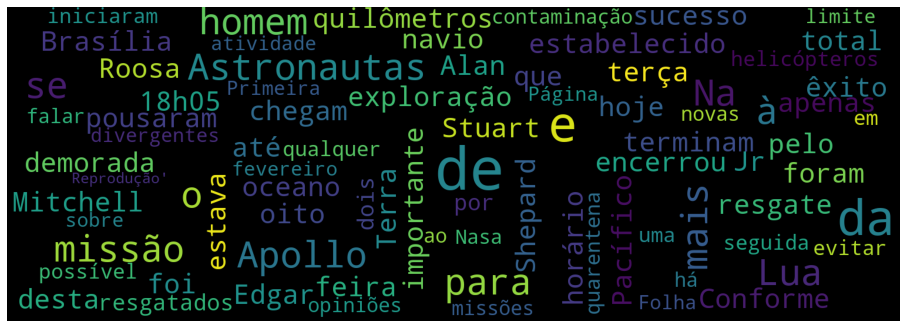

In [169]:
#Nuven de Palavras referente ao texto 3.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [170]:
#Puxando o texto4
texto4 = "1971: Astronautas da Apollo 14 terminam missão na Lua e viajam para a Terra': ' Os astronautas da missão Apollo 14 encerraram neste sábado (6) a mais prolongada excursão humana na superfície da Lua. Eles realizaram experiências científicas em colinas do satélite natural, recolheram rochas, mas não conseguiram subir em uma das crateras. Agora, estão voltando para a Terra. O módulo lunar se acoplou à nave-mãe sem dificuldades, diferentemente do que ocorreu na ida.Os astronautas Alan Shepard Jr. e Edgar Mitchell, que estavam no módulo, passaram por um túnel para chegar à nave de comando, onde estava o terceiro integrante da missão, Stuart Roosa. Primeira Página da Folha de 7 de fevereiro de 1971"

doc4 = nlp(texto4)

In [171]:
doc4

1971: Astronautas da Apollo 14 terminam missão na Lua e viajam para a Terra': ' Os astronautas da missão Apollo 14 encerraram neste sábado (6) a mais prolongada excursão humana na superfície da Lua. Eles realizaram experiências científicas em colinas do satélite natural, recolheram rochas, mas não conseguiram subir em uma das crateras. Agora, estão voltando para a Terra. O módulo lunar se acoplou à nave-mãe sem dificuldades, diferentemente do que ocorreu na ida.Os astronautas Alan Shepard Jr. e Edgar Mitchell, que estavam no módulo, passaram por um túnel para chegar à nave de comando, onde estava o terceiro integrante da missão, Stuart Roosa. Primeira Página da Folha de 7 de fevereiro de 1971

In [172]:
#Tokenização do texto4
tokens = [token for token in doc4]
[(token.orth_, token.pos_) for token in doc4]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Astronautas', 'PROPN'),
 ('da', 'ADP'),
 ('Apollo', 'PROPN'),
 ('14', 'NUM'),
 ('terminam', 'VERB'),
 ('missão', 'NOUN'),
 ('na', 'ADP'),
 ('Lua', 'NOUN'),
 ('e', 'CCONJ'),
 ('viajam', 'VERB'),
 ('para', 'ADP'),
 ('a', 'DET'),
 ('Terra', 'PROPN'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('Os', 'DET'),
 ('astronautas', 'NOUN'),
 ('da', 'ADP'),
 ('missão', 'NOUN'),
 ('Apollo', 'PROPN'),
 ('14', 'NUM'),
 ('encerraram', 'VERB'),
 ('neste', 'ADP'),
 ('sábado', 'NOUN'),
 ('(', 'PUNCT'),
 ('6', 'NUM'),
 (')', 'PUNCT'),
 ('a', 'DET'),
 ('mais', 'ADV'),
 ('prolongada', 'VERB'),
 ('excursão', 'NOUN'),
 ('humana', 'ADJ'),
 ('na', 'ADP'),
 ('superfície', 'NOUN'),
 ('da', 'ADP'),
 ('Lua', 'NOUN'),
 ('.', 'PUNCT'),
 ('Eles', 'PRON'),
 ('realizaram', 'VERB'),
 ('experiências', 'NOUN'),
 ('científicas', 'ADJ'),
 ('em', 'ADP'),
 ('colinas', 'NOUN'),
 ('do', 'ADP'),
 ('satélite', 'NOUN'),
 ('natural', 'ADJ'),
 (',', 'PUNCT'),
 ('recolheram', 'VERB'),
 ('

In [173]:
#indentificando as entidades do texto 4
for ent in doc4.ents:
    print(ent.text, ent.label_)

Astronautas PER
Apollo 14 MISC
Lua LOC
Terra LOC
Apollo 14 MISC
Lua LOC
Terra LOC
Alan Shepard Jr. PER
Edgar Mitchell PER
Stuart Roosa PER
Primeira Página da Folha de 7 LOC


In [174]:
#indentificando os verbos do texto 4.  
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto4)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{ocorreu, terminam, realizaram, encerraram, passaram, acoplou}


['terminar',
 'viajar',
 'encerrar',
 'prolongar',
 'realizar',
 'recolher',
 'conseguir',
 'subir',
 'voltar',
 'acoplou',
 'nave-mãe',
 'ocorrer',
 'passar',
 'chegar']

In [175]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo4.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

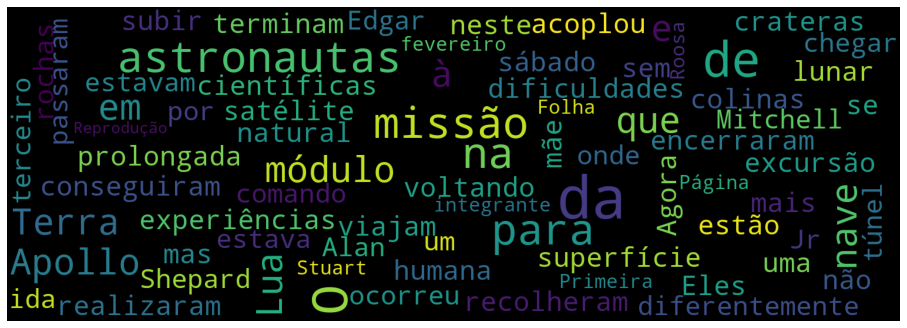

In [176]:
#Nuven de Palavras referente ao texto 4.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [177]:
#Puxando o texto5
texto5 = "1971: Futuro prefeito de São Paulo aponta metrô como uma das prioridades': ' A construção do metrô foi uma das metas prioritárias apontadas pelo próximo prefeito de São Paulo, o engenheiro José Carlos de Figueiredo Ferraz, em entrevista nesta sexta-feira (12), quando anunciou os nomes do seu secretariado e auxiliares diretos. “Prioridade ao metrô, entretanto, não significa negligência às obras de superfície - ruas, pontes, viadutos, avenidas”, declarou. Ele afirmou que é complexo e delicado estipular datas para a entrega das obras, mas disse crer que o prazo fixado anteriormente possa ser mantido: a primeira linha do metrô, a Norte-Sul, poderá ser entregue durante o ano de 1973.Primeira Página da Folha de 13 de março de 1971"

doc5 = nlp(texto5)

In [178]:
doc5

1971: Futuro prefeito de São Paulo aponta metrô como uma das prioridades': ' A construção do metrô foi uma das metas prioritárias apontadas pelo próximo prefeito de São Paulo, o engenheiro José Carlos de Figueiredo Ferraz, em entrevista nesta sexta-feira (12), quando anunciou os nomes do seu secretariado e auxiliares diretos. “Prioridade ao metrô, entretanto, não significa negligência às obras de superfície - ruas, pontes, viadutos, avenidas”, declarou. Ele afirmou que é complexo e delicado estipular datas para a entrega das obras, mas disse crer que o prazo fixado anteriormente possa ser mantido: a primeira linha do metrô, a Norte-Sul, poderá ser entregue durante o ano de 1973.Primeira Página da Folha de 13 de março de 1971

In [179]:
#Tokenização do texto5
tokens = [token for token in doc5]
[(token.orth_, token.pos_) for token in doc5]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Futuro', 'ADJ'),
 ('prefeito', 'NOUN'),
 ('de', 'ADP'),
 ('São', 'PROPN'),
 ('Paulo', 'PROPN'),
 ('aponta', 'VERB'),
 ('metrô', 'VERB'),
 ('como', 'ADP'),
 ('uma', 'NUM'),
 ('das', 'ADP'),
 ('prioridades', 'NOUN'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('A', 'DET'),
 ('construção', 'NOUN'),
 ('do', 'ADP'),
 ('metrô', 'NOUN'),
 ('foi', 'AUX'),
 ('uma', 'NUM'),
 ('das', 'ADP'),
 ('metas', 'NOUN'),
 ('prioritárias', 'ADJ'),
 ('apontadas', 'VERB'),
 ('pelo', 'ADP'),
 ('próximo', 'ADJ'),
 ('prefeito', 'NOUN'),
 ('de', 'ADP'),
 ('São', 'PROPN'),
 ('Paulo', 'PROPN'),
 (',', 'PUNCT'),
 ('o', 'DET'),
 ('engenheiro', 'NOUN'),
 ('José', 'PROPN'),
 ('Carlos', 'PROPN'),
 ('de', 'ADP'),
 ('Figueiredo', 'PROPN'),
 ('Ferraz', 'PROPN'),
 (',', 'PUNCT'),
 ('em', 'ADP'),
 ('entrevista', 'NOUN'),
 ('nesta', 'ADP'),
 ('sexta-feira', 'NOUN'),
 ('(', 'PUNCT'),
 ('12', 'NUM'),
 (')', 'PUNCT'),
 (',', 'PUNCT'),
 ('quando', 'ADV'),
 ('anunciou', 'VERB'),
 ('os

In [180]:
#indentificando as entidades do texto 5
for ent in doc5.ents:
    print(ent.text, ent.label_)

Futuro LOC
de São Paulo LOC
de São Paulo LOC
José Carlos de Figueiredo Ferraz PER
Norte-Sul LOC
Página da Folha de 13 LOC


In [181]:
#indentificando os verbos do texto 5.  
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto5)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{anunciou, afirmou}


['apontar',
 'metrô',
 'apontar',
 'anunciar',
 'significar',
 'avenida',
 'declarar',
 'afirmar',
 'delicado',
 'estipular',
 'dizer',
 'crer',
 'fixar',
 'poder',
 'manter',
 'poder',
 'entregar']

In [182]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo5.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

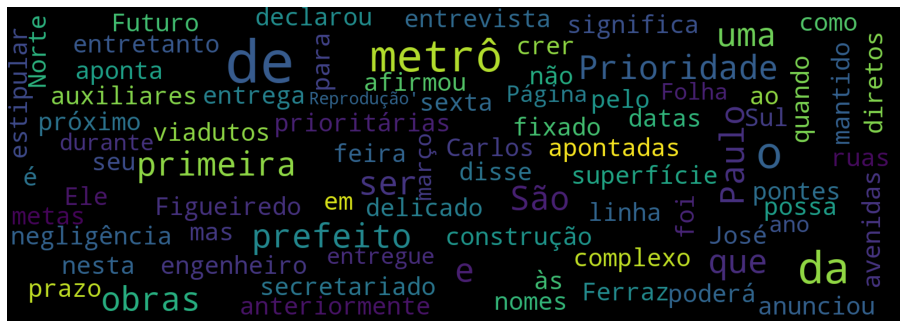

In [183]:
#Nuven de Palavras referente ao texto 5.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [184]:
#Puxando o texto6
texto6 = "1971: Astronautas vão voltar a viajar para a Lua depois do drama da Apollo 13': ' Os preparativos para o lançamento da nave espacial Apollo 14 para a Lua, marcado para este domingo (31), prosseguiram rigorosamente dentro do programa. Os astronautas Alan Shepard Jr., Stuart Roosa e Edgar Mitchell partirão às 17h23 de Cabo Kennedy, na Flórida (EUA), para explorar a região de Fra Mauro da Lua. Esse ponto também tinha sido escolhido para o pouso do malogrado voo da Apollo 13 no ano passado. Durante aquela missão, houve uma explosão na nave. Os astronautas James Lovell, Fred Haise e John Swigert conseguiram com dificuldade voltar para a Terra.Primeira Página da Folha de 31 janeiro de 1971 "

doc6 = nlp(texto6)

In [185]:
doc6

1971: Astronautas vão voltar a viajar para a Lua depois do drama da Apollo 13': ' Os preparativos para o lançamento da nave espacial Apollo 14 para a Lua, marcado para este domingo (31), prosseguiram rigorosamente dentro do programa. Os astronautas Alan Shepard Jr., Stuart Roosa e Edgar Mitchell partirão às 17h23 de Cabo Kennedy, na Flórida (EUA), para explorar a região de Fra Mauro da Lua. Esse ponto também tinha sido escolhido para o pouso do malogrado voo da Apollo 13 no ano passado. Durante aquela missão, houve uma explosão na nave. Os astronautas James Lovell, Fred Haise e John Swigert conseguiram com dificuldade voltar para a Terra.Primeira Página da Folha de 31 janeiro de 1971 

In [186]:
#Tokenização do texto6
tokens = [token for token in doc6]
[(token.orth_, token.pos_) for token in doc6]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Astronautas', 'PROPN'),
 ('vão', 'AUX'),
 ('voltar', 'VERB'),
 ('a', 'SCONJ'),
 ('viajar', 'VERB'),
 ('para', 'ADP'),
 ('a', 'DET'),
 ('Lua', 'NOUN'),
 ('depois', 'ADV'),
 ('do', 'ADP'),
 ('drama', 'NOUN'),
 ('da', 'ADP'),
 ('Apollo', 'PROPN'),
 ('13', 'NUM'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('Os', 'DET'),
 ('preparativos', 'NOUN'),
 ('para', 'ADP'),
 ('o', 'DET'),
 ('lançamento', 'NOUN'),
 ('da', 'ADP'),
 ('nave', 'NOUN'),
 ('espacial', 'ADJ'),
 ('Apollo', 'PROPN'),
 ('14', 'NUM'),
 ('para', 'ADP'),
 ('a', 'DET'),
 ('Lua', 'NOUN'),
 (',', 'PUNCT'),
 ('marcado', 'VERB'),
 ('para', 'ADP'),
 ('este', 'DET'),
 ('domingo', 'NOUN'),
 ('(', 'PUNCT'),
 ('31', 'NUM'),
 (')', 'PUNCT'),
 (',', 'PUNCT'),
 ('prosseguiram', 'VERB'),
 ('rigorosamente', 'ADV'),
 ('dentro', 'ADV'),
 ('do', 'ADP'),
 ('programa', 'NOUN'),
 ('.', 'PUNCT'),
 ('Os', 'DET'),
 ('astronautas', 'NOUN'),
 ('Alan', 'PROPN'),
 ('Shepard', 'PROPN'),
 ('Jr.', 'PROPN'),
 (','

In [187]:
#indentificando as entidades do texto 6
for ent in doc6.ents:
    print(ent.text, ent.label_)

Astronautas PER
Lua LOC
Apollo MISC
Apollo 14 MISC
Lua LOC
Alan Shepard Jr. PER
Stuart Roosa PER
Edgar Mitchell PER
Cabo Kennedy LOC
Flórida LOC
EUA LOC
Fra Mauro da LOC
Lua LOC
Apollo 13 MISC
James Lovell PER
Fred Haise PER
John Swigert PER
Terra LOC
Primeira Página da Folha LOC


In [188]:
#indentificando os verbos do texto 6.  
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto6)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{prosseguiram, conseguiram, partirão, viajar}


['voltar',
 'viajar',
 'marcar',
 'prosseguir',
 'partir',
 'explorar',
 'escolher',
 'haver',
 'conseguir',
 'voltar']

In [189]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo6.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

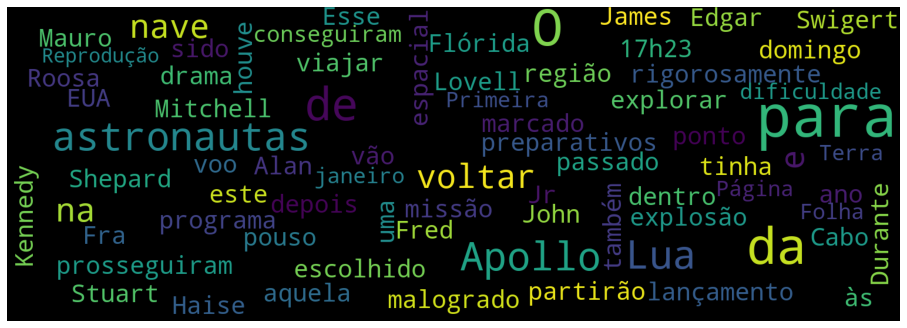

In [190]:
#Nuven de Palavras referente ao texto 6.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [191]:
#Puxando o texto7
texto7 = "1971: USP precisa receber mais dinheiro para não parar': ' A Universidade de São Paulo não terá condições de funcionar depois de setembro se o governo estadual não conceder uma suplementação orçamentária que, de acordo com as estimativas menos pessimistas, precisaria chegar a 100 milhões de cruzeiros (aproximadamente R$ 730 milhões). A principal razão para a ocorrência desse déficit está no reajuste de vencimentos do corpo docente e do pessoal administrativo. A USP não tinha sido suficientemente compensada para arcar com o ônus do reenquadramento de seu funcionalismo em novas categorias salariais, quando a Lei da Paridade entrou em vigor.Primeira Página da Folha de 16 de fevereiro de 1971 "

doc7 = nlp(texto7)

In [192]:
doc7

1971: USP precisa receber mais dinheiro para não parar': ' A Universidade de São Paulo não terá condições de funcionar depois de setembro se o governo estadual não conceder uma suplementação orçamentária que, de acordo com as estimativas menos pessimistas, precisaria chegar a 100 milhões de cruzeiros (aproximadamente R$ 730 milhões). A principal razão para a ocorrência desse déficit está no reajuste de vencimentos do corpo docente e do pessoal administrativo. A USP não tinha sido suficientemente compensada para arcar com o ônus do reenquadramento de seu funcionalismo em novas categorias salariais, quando a Lei da Paridade entrou em vigor.Primeira Página da Folha de 16 de fevereiro de 1971 

In [193]:
#Tokenização do texto7
tokens = [token for token in doc7]
[(token.orth_, token.pos_) for token in doc7]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('USP', 'NOUN'),
 ('precisa', 'VERB'),
 ('receber', 'VERB'),
 ('mais', 'DET'),
 ('dinheiro', 'NOUN'),
 ('para', 'SCONJ'),
 ('não', 'ADV'),
 ('parar', 'VERB'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('A', 'DET'),
 ('Universidade', 'PROPN'),
 ('de', 'ADP'),
 ('São', 'PROPN'),
 ('Paulo', 'PROPN'),
 ('não', 'ADV'),
 ('terá', 'VERB'),
 ('condições', 'NOUN'),
 ('de', 'SCONJ'),
 ('funcionar', 'VERB'),
 ('depois', 'ADV'),
 ('de', 'ADP'),
 ('setembro', 'NOUN'),
 ('se', 'SCONJ'),
 ('o', 'DET'),
 ('governo', 'NOUN'),
 ('estadual', 'ADJ'),
 ('não', 'ADV'),
 ('conceder', 'VERB'),
 ('uma', 'DET'),
 ('suplementação', 'NOUN'),
 ('orçamentária', 'ADJ'),
 ('que', 'PRON'),
 (',', 'PUNCT'),
 ('de', 'ADP'),
 ('acordo', 'NOUN'),
 ('com', 'ADP'),
 ('as', 'DET'),
 ('estimativas', 'NOUN'),
 ('menos', 'ADV'),
 ('pessimistas', 'ADJ'),
 (',', 'PUNCT'),
 ('precisaria', 'VERB'),
 ('chegar', 'VERB'),
 ('a', 'ADP'),
 ('100', 'NUM'),
 ('milhões', 'NUM'),
 ('de', 'ADP'),

In [194]:
#indentificando as entidades do texto 7
for ent in doc7.ents:
    print(ent.text, ent.label_)

USP LOC
Universidade de São Paulo LOC
R$ LOC
USP LOC
Lei da Paridade MISC
Primeira Página da Folha de 16 MISC


In [195]:
#indentificando os verbos do texto 7.  
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto7)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{compensada, precisa, conceder, entrou}


['preciso',
 'receber',
 'parar',
 'ter',
 'funcionar',
 'conceder',
 'precisar',
 'chegar',
 'compensar',
 'arcar',
 'entrar']

In [196]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo7.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

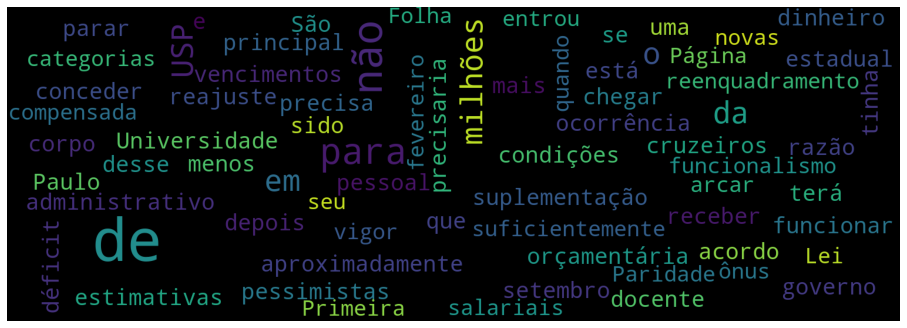

In [197]:
#Nuven de Palavras referente ao texto 7.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [198]:
#Puxando o texto8
texto8 = "1971: Ingleses propõem que Nobel da Paz seja entregue aos irmãos Villas Bôas': ' Os 28 anos de trabalhos dedicados aos índios poderão dar aos irmãos Orlando e Claudio Villas Bôas o Prêmio Nobel da Paz deste ano. A indicação dos nomes dos sertanistas brasileiros foi feita pela Fundação dos Povos Primitivos, com sede em Londres.Durante esses anos, os irmãos enfrentaram muitos perigos nas matas para tentar garantir aos índios o direito de evoluir naturalmente, mantendo a cultura, costumes e tradições. Orlando disse estar honrado com a indicação. “O que se pretende é prestigiar alguém que simbolize o movimento humanístico de assistência aos índios”, declarou.Primeira Página da Folha de 14 de fevereiro de 1971 "

doc8 = nlp(texto8)

In [199]:
doc8

1971: Ingleses propõem que Nobel da Paz seja entregue aos irmãos Villas Bôas': ' Os 28 anos de trabalhos dedicados aos índios poderão dar aos irmãos Orlando e Claudio Villas Bôas o Prêmio Nobel da Paz deste ano. A indicação dos nomes dos sertanistas brasileiros foi feita pela Fundação dos Povos Primitivos, com sede em Londres.Durante esses anos, os irmãos enfrentaram muitos perigos nas matas para tentar garantir aos índios o direito de evoluir naturalmente, mantendo a cultura, costumes e tradições. Orlando disse estar honrado com a indicação. “O que se pretende é prestigiar alguém que simbolize o movimento humanístico de assistência aos índios”, declarou.Primeira Página da Folha de 14 de fevereiro de 1971 

In [200]:
#Tokenização do texto8
tokens = [token for token in doc8]
[(token.orth_, token.pos_) for token in doc8]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Ingleses', 'PROPN'),
 ('propõem', 'VERB'),
 ('que', 'SCONJ'),
 ('Nobel', 'PROPN'),
 ('da', 'ADP'),
 ('Paz', 'PROPN'),
 ('seja', 'AUX'),
 ('entregue', 'VERB'),
 ('aos', 'ADP'),
 ('irmãos', 'NOUN'),
 ('Villas', 'PROPN'),
 ('Bôas', 'PROPN'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('Os', 'DET'),
 ('28', 'NUM'),
 ('anos', 'NOUN'),
 ('de', 'ADP'),
 ('trabalhos', 'NOUN'),
 ('dedicados', 'VERB'),
 ('aos', 'ADP'),
 ('índios', 'NOUN'),
 ('poderão', 'VERB'),
 ('dar', 'VERB'),
 ('aos', 'ADP'),
 ('irmãos', 'NOUN'),
 ('Orlando', 'PROPN'),
 ('e', 'CCONJ'),
 ('Claudio', 'PROPN'),
 ('Villas', 'PROPN'),
 ('Bôas', 'PROPN'),
 ('o', 'DET'),
 ('Prêmio', 'PROPN'),
 ('Nobel', 'PROPN'),
 ('da', 'ADP'),
 ('Paz', 'PROPN'),
 ('deste', 'ADP'),
 ('ano', 'NOUN'),
 ('.', 'PUNCT'),
 ('A', 'DET'),
 ('indicação', 'NOUN'),
 ('dos', 'ADP'),
 ('nomes', 'NOUN'),
 ('dos', 'ADP'),
 ('sertanistas', 'NOUN'),
 ('brasileiros', 'ADJ'),
 ('foi', 'AUX'),
 ('feita', 'VERB'),
 ('pela'

In [201]:
#indentificando as entidades do texto 8
for ent in doc8.ents:
    print(ent.text, ent.label_)

Ingleses LOC
Nobel da Paz MISC
Villas Bôas PER
Orlando PER
Claudio Villas Bôas PER
Prêmio Nobel da Paz MISC
Fundação dos Povos Primitivos ORG
Londres LOC
Orlando PER
Primeira Página da Folha de 14 MISC


In [202]:
#indentificando os verbos do texto 8
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto8)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{enfrentaram, simbolize, propõem, disse, prestigiar, pretende, dar}


['propor',
 'entregar',
 'dedicar',
 'poder',
 'dar',
 'feito',
 'enfrentar',
 'tentar',
 'garantir',
 'evoluir',
 'manter',
 'dizer',
 'pretender',
 'prestigiar',
 'simbolizar',
 'declarar']

In [203]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo8.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

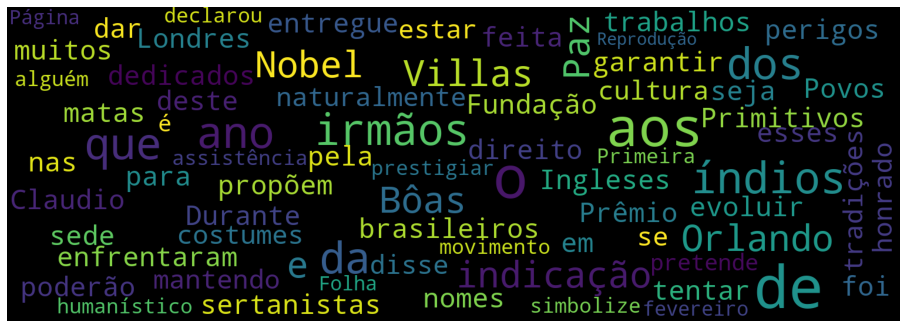

In [204]:
#Nuven de Palavras referente ao texto 8.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [205]:
#Puxando o texto9
texto9 = "1971: Irã incentiva que países produtores de petróleo determinem o reajuste': ' O xá Reza Pahlavi, do Irã, estimulou os países produtores de petróleo a reajustar os preços unilateralmente, diante do fracasso das negociações com as companhias internacionais. Ele também sugeriu a suspensão das exportações caso as empresas não concordem. Sua proposta foi apoiada por outros nove integrantes da Opep (Organização dos Países Exportadores de Petróleo), como a Arábia Saudita.Reza Pahlavi citou o exemplo da Venezuela, que aprovou recentemente uma lei aumentando os impostos sobre a renda das companhias petrolíferas e elevando a participação do governo nos lucros da venda de petróleo. Primeira Página da Folha de 4 de fevereiro de 1971"
doc9 = nlp(texto9)

In [206]:
doc9

1971: Irã incentiva que países produtores de petróleo determinem o reajuste': ' O xá Reza Pahlavi, do Irã, estimulou os países produtores de petróleo a reajustar os preços unilateralmente, diante do fracasso das negociações com as companhias internacionais. Ele também sugeriu a suspensão das exportações caso as empresas não concordem. Sua proposta foi apoiada por outros nove integrantes da Opep (Organização dos Países Exportadores de Petróleo), como a Arábia Saudita.Reza Pahlavi citou o exemplo da Venezuela, que aprovou recentemente uma lei aumentando os impostos sobre a renda das companhias petrolíferas e elevando a participação do governo nos lucros da venda de petróleo. Primeira Página da Folha de 4 de fevereiro de 1971

In [207]:
#Tokenização do texto9
tokens = [token for token in doc9]
[(token.orth_, token.pos_) for token in doc9]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Irã', 'PROPN'),
 ('incentiva', 'ADJ'),
 ('que', 'SCONJ'),
 ('países', 'NOUN'),
 ('produtores', 'ADJ'),
 ('de', 'ADP'),
 ('petróleo', 'NOUN'),
 ('determinem', 'VERB'),
 ('o', 'DET'),
 ('reajuste', 'NOUN'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('O', 'DET'),
 ('xá', 'NOUN'),
 ('Reza', 'PROPN'),
 ('Pahlavi', 'PROPN'),
 (',', 'PUNCT'),
 ('do', 'ADP'),
 ('Irã', 'PROPN'),
 (',', 'PUNCT'),
 ('estimulou', 'VERB'),
 ('os', 'DET'),
 ('países', 'NOUN'),
 ('produtores', 'ADJ'),
 ('de', 'ADP'),
 ('petróleo', 'NOUN'),
 ('a', 'SCONJ'),
 ('reajustar', 'VERB'),
 ('os', 'DET'),
 ('preços', 'NOUN'),
 ('unilateralmente', 'ADV'),
 (',', 'PUNCT'),
 ('diante', 'ADV'),
 ('do', 'DET'),
 ('fracasso', 'NOUN'),
 ('das', 'ADP'),
 ('negociações', 'NOUN'),
 ('com', 'ADP'),
 ('as', 'DET'),
 ('companhias', 'NOUN'),
 ('internacionais', 'ADJ'),
 ('.', 'PUNCT'),
 ('Ele', 'PRON'),
 ('também', 'ADV'),
 ('sugeriu', 'VERB'),
 ('a', 'DET'),
 ('suspensão', 'NOUN'),
 ('das', '

In [208]:
#indentificando as entidades do texto 9
for ent in doc9.ents:
    print(ent.text, ent.label_)

Irã LOC
Reza Pahlavi PER
Irã LOC
Opep ORG
Organização dos Países Exportadores de Petróleo ORG
Arábia Saudita LOC
Reza Pahlavi PER
Venezuela LOC
Primeira Página da Folha LOC


In [209]:
#indentificando os verbos do texto 9.  
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto9)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{concordem, aprovou, citou, estimulou, determinem, sugeriu}


['determinar',
 'estimular',
 'reajustar',
 'sugerir',
 'concordar',
 'apoiar',
 'citar',
 'aprovar',
 'aumentar',
 'elevar']

In [210]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo9.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

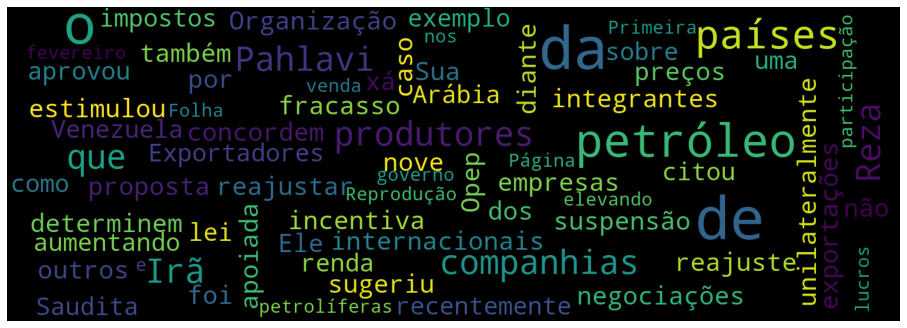

In [211]:
#Nuven de Palavras referente ao texto 9.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [212]:
#Puxando o texto 10
texto10 = "1971: Estudantes localizam o 1º foco de ferrugem do cafeeiro em São Paulo': ' Em uma fazenda em Pedregulho (a cerca de 480 quilômetros ao norte de São Paulo), dois estudantes de agronomia encontraram o primeiro foco da ferrugem do cafeeiro no estado.Uma comitiva de técnicos viajou para o local para realizar os trabalhos de interdição e de isolamento da área afetada pela doença que ataca os cafezais. A estratégia para impedir a propagação da ferrugem envolve toda a região da Alta Mogiana e vai exigir a vistoria em veículos para tentar impedir a transferência de qualquer muda, galho, folha ou fruto do café para outras áreas do estado.Primeira Página da Folha de 30 janeiro de 1971"

doc10 = nlp(texto10)

In [213]:
doc10

1971: Estudantes localizam o 1º foco de ferrugem do cafeeiro em São Paulo': ' Em uma fazenda em Pedregulho (a cerca de 480 quilômetros ao norte de São Paulo), dois estudantes de agronomia encontraram o primeiro foco da ferrugem do cafeeiro no estado.Uma comitiva de técnicos viajou para o local para realizar os trabalhos de interdição e de isolamento da área afetada pela doença que ataca os cafezais. A estratégia para impedir a propagação da ferrugem envolve toda a região da Alta Mogiana e vai exigir a vistoria em veículos para tentar impedir a transferência de qualquer muda, galho, folha ou fruto do café para outras áreas do estado.Primeira Página da Folha de 30 janeiro de 1971

In [214]:
#Tokenização do texto10
tokens = [token for token in doc10]
[(token.orth_, token.pos_) for token in doc10]

[('1971', 'NUM'),
 (':', 'PUNCT'),
 ('Estudantes', 'NOUN'),
 ('localizam', 'VERB'),
 ('o', 'DET'),
 ('1º', 'ADJ'),
 ('foco', 'NOUN'),
 ('de', 'ADP'),
 ('ferrugem', 'NOUN'),
 ('do', 'ADP'),
 ('cafeeiro', 'NOUN'),
 ('em', 'ADP'),
 ('São', 'PROPN'),
 ('Paulo', 'PROPN'),
 ("'", 'PUNCT'),
 (':', 'PUNCT'),
 ("'", 'PUNCT'),
 ('Em', 'ADP'),
 ('uma', 'DET'),
 ('fazenda', 'NOUN'),
 ('em', 'ADP'),
 ('Pedregulho', 'PROPN'),
 ('(', 'PUNCT'),
 ('a', 'ADP'),
 ('cerca', 'ADV'),
 ('de', 'ADP'),
 ('480', 'NUM'),
 ('quilômetros', 'NOUN'),
 ('ao', 'ADP'),
 ('norte', 'NOUN'),
 ('de', 'ADP'),
 ('São', 'PROPN'),
 ('Paulo', 'PROPN'),
 (')', 'PUNCT'),
 (',', 'PUNCT'),
 ('dois', 'NUM'),
 ('estudantes', 'NOUN'),
 ('de', 'ADP'),
 ('agronomia', 'NOUN'),
 ('encontraram', 'VERB'),
 ('o', 'DET'),
 ('primeiro', 'ADJ'),
 ('foco', 'NOUN'),
 ('da', 'ADP'),
 ('ferrugem', 'NOUN'),
 ('do', 'ADP'),
 ('cafeeiro', 'NOUN'),
 ('no', 'ADP'),
 ('estado', 'NOUN'),
 ('.', 'PUNCT'),
 ('Uma', 'DET'),
 ('comitiva', 'NOUN'),
 ('de', 'AD

In [215]:
#indentificando as entidades do texto 10
for ent in doc10.ents:
    print(ent.text, ent.label_)

São Paulo LOC
Pedregulho LOC
São Paulo LOC
Alta Mogiana LOC
Primeira Página da Folha LOC


In [216]:
#indentificando os verbos do texto 10.  
nlp = spacy.load("pt_core_news_sm")
doc = nlp(texto10)
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)
[token.lemma_ for token in doc if token.pos_ == 'VERB'] 

{viajou, ataca, envolve, encontraram, localizam}


['localizar',
 'encontrar',
 'viajar',
 'realizar',
 'afetada',
 'atacar',
 'impedir',
 'envolver',
 'exigir',
 'tentar',
 'impedir']

In [217]:
with open("C:/Users/Vanessa/.vscode/avaliacao 3/artigo10.txt", "r", encoding='utf-8') as f:
    artigos = f.read()

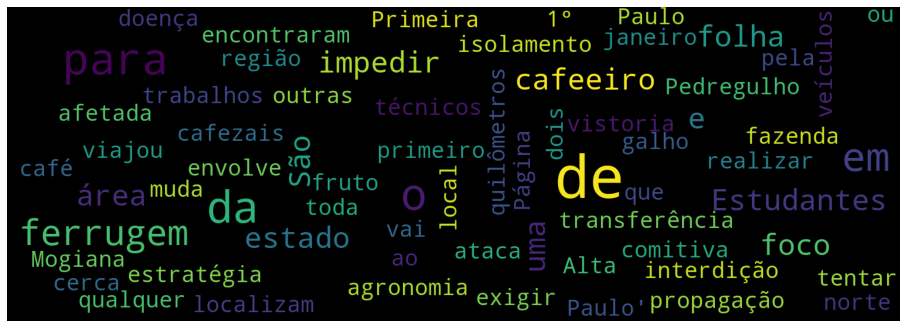

In [218]:
#Nuven de Palavras referente ao texto 10.
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(artigos)
stopwords = set(STOPWORDS)
stopwords.add("said")

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [219]:
#testes com os titulos dos textos:
# 1971: Instituto de Pesquisas Espaciais é criado para estudos no âmbito civil
# 1971: Sorvete em quadra esfria a reação da seleção feminina de basquete
# 1971: Astronautas da Apollo 14 chegam à Terra e terminam missão com êxito
# 1971: Astronautas da Apollo 14 terminam missão na Lua e viajam para a Terra
# 1971: Futuro prefeito de São Paulo aponta metrô como uma das prioridades
# 1971: Astronautas vão voltar a viajar para a Lua depois do drama da Apollo 13
# 1971: USP precisa receber mais dinheiro para não parar
# 1971: Ingleses propõem que Nobel da Paz seja entregue aos irmãos Villas Bôas
# 1971: Irã incentiva que países produtores de petróleo determinem o reajuste
# 1971: Estudantes localizam o 1º foco de ferrugem do cafeeiro em São Paulo

In [221]:
#teste com os paragrafos dos textos!!
testes = ["Instituto de Pesquisas Espaciais é criado para estudos no âmbito civil" , 
"Sorvete em quadra esfria a reação da seleção feminina de basquete",
"Astronautas da Apollo 14 chegam à Terra e terminam missão com êxito",
"Astronautas da Apollo 14 terminam missão na Lua e viajam para a Terra",
"Futuro prefeito de São Paulo aponta metrô como uma das prioridades" ,
"Astronautas vão voltar a viajar para a Lua depois do drama da Apollo 13" ,
"USP precisa receber mais dinheiro para não parar",
"Ingleses propõem que Nobel da Paz seja entregue aos irmãos Villas Bôas" ,
"Irã incentiva que países produtores de petróleo determinem o reajuste" ,
"Estudantes localizam o 1º foco de ferrugem do cafeeiro em São Paulo"]        

freq_testes = Vectorizer.transform(testes)
sentimento = modelo.predict(freq_testes)

In [222]:
print(sentimento)

['Positivo' 'Positivo' 'Neutro' 'Neutro' 'Negativo' 'Neutro' 'Negativo'
 'Neutro' 'Neutro' 'Negativo']


In [223]:
#criando dataframe com os titulos e a classificacao
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)


df_sentimento = pd.DataFrame(sentimento, testes)
df_sentimento = df_sentimento.rename(columns={0: 'Títulos --> classificacao'})
print(df_sentimento)

                                                                        Títulos --> classificacao
Instituto de Pesquisas Espaciais é criado para estudos no âmbito civil                   Positivo
Sorvete em quadra esfria a reação da seleção feminina de basquete                        Positivo
Astronautas da Apollo 14 chegam à Terra e terminam missão com êxito                        Neutro
Astronautas da Apollo 14 terminam missão na Lua e viajam para a Terra                      Neutro
Futuro prefeito de São Paulo aponta metrô como uma das prioridades                       Negativo
Astronautas vão voltar a viajar para a Lua depois do drama da Apollo 13                    Neutro
USP precisa receber mais dinheiro para não parar                                         Negativo
Ingleses propõem que Nobel da Paz seja entregue aos irmãos Villas Bôas                     Neutro
Irã incentiva que países produtores de petróleo determinem o reajuste                      Neutro
Estudantes localizam

In [224]:
# salvando o treinamento no mongo
cliente = pymongo.MongoClient("mongodb://localhost:27017/")
banco = cliente['Tratamento'] 
gravando = banco["Sentimentos"]
dados = df_sentimento.to_dict('list')
valor = ((dados))
gravando_banco = gravando.insert_one(valor)